In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import sidetable as stb

In [84]:
df = pd.read_csv("bigmartsales.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Question 1: 
    Calculate the Measures of Central Tendency - Mean, Median, and Mode for the ltemMRP column (Use 
    DataFrame Functions) - Beginner

In [26]:
pd.concat([df[['Item_MRP']].agg(['mean','median']).T,pd.Series(df['Item_MRP'].mode()[0], index=['Item_MRP'],name='mode')],axis=1)

,mean,median,mode
Item_MRP,140.992782,143.0128,172.0422


In [20]:
pd.Series(df['Item_MRP'].mode()[0])

0    172.0422
dtype: float64

### Question 2:
    Calculate the Measures of Spread - Range, Standard Deviation, and Variance for the ltem_MRP column -
    Beginner

In [29]:
print("Range",np.ptp(df['Item_MRP']))
print("std",np.std(df['Item_MRP']))
print("var",np.var(df['Item_MRP']))

Range 235.5984
std 62.271413051361094
var 3877.728883413225


### Question 3: 
    Obtain different summary statistics (Skewness and Kurtosis) for the ltem_Outlet_Sales column and print their values - 
    Beginner

In [32]:
from scipy.stats import skew, kurtosis
print(f"skew ltem_Outlet_Sales: {skew(df['Item_Outlet_Sales'])}")
print(f"Pearson kurtosis ltem_Outlet_Sales: {kurtosis(df['Item_Outlet_Sales'], fisher=False)}")
print(f"Fisher kurtosis ltem_Outlet_Sales: {kurtosis(df['Item_Outlet_Sales'], fisher=True)}")

skew ltem_Outlet_Sales: 1.177323353967637
Pearson kurtosis ltem_Outlet_Sales: 4.614224991590342
Fisher kurtosis ltem_Outlet_Sales: 1.6142249915903424


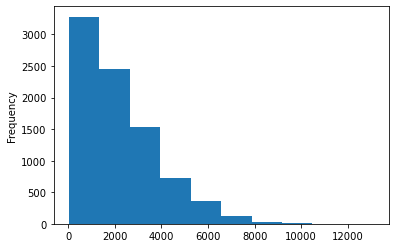

In [41]:
df['Item_Outlet_Sales'].plot(kind='hist')
plt.show()

### Question 4: 
    Detect and remove Outliers based on data in ltem_MRP & ltem_Outlet_Sales columns using Z-Score -Advanced

In [85]:
from scipy.stats import zscore
zscores = np.abs(zscore(df[['Item_MRP','Item_Outlet_Sales']]))
zscores[:10]

array([[1.74745381, 0.910601  ],
       [1.48902325, 1.01844035],
       [0.01004021, 0.04923754],
       [0.66004955, 0.84910299],
       [1.39921961, 0.69537275],
       [1.43873372, 0.95211005],
       [1.33823817, 1.07696709],
       [0.53364105, 1.07915801],
       [0.70690835, 0.64738082],
       [0.75200828, 1.48221216]])

In [86]:
np.where(zscores>3)

(array([ 130,  145,  276,  304,  333,  373,  456,  472,  661,  694,  753,
         809,  935,  991,  997, 1009, 1138, 1254, 1450, 1506, 1859, 1998,
        2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154,
        3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676,
        4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500,
        5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537,
        6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302,
        7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201,
        8245, 8447], dtype=int64),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1], dtype=int64))

In [87]:
df = pd.concat([df, pd.DataFrame(zscores, columns=['Item_MRP_zscore','Item_Outlet_Sales_zscore'], index=df.index)], axis=1)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_MRP_zscore,Item_Outlet_Sales_zscore
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.747454,0.910601
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.489023,1.018440
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.010040,0.049238
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0.660050,0.849103
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1.399220,0.695373


In [88]:
print(f"shape before dropping {df.shape}")
result = df[(zscores<3).all(axis=1)]
df=result
df.shape

shape before dropping (8523, 14)


(8433, 14)

### Question 5: 
    Detect Outliers based on data in ltem_Outlet_Sales column using !QR-Advanced (Bridging Gap Question)

In [106]:
from scipy.stats import iqr
q1, q3 = np.percentile(df['Item_Outlet_Sales'].sort_values(), [25,75])
iqr = iqr(df['Item_Outlet_Sales'])
lower = q1 - (1.5*iqr)
higher = q3 + (1.5*iqr)
lower, higher

(-2528.3755, 6406.6605)

In [108]:
f = (df['Item_Outlet_Sales'] < lower) | (df['Item_Outlet_Sales'] > higher)
df[f]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_MRP_zscore,Item_Outlet_Sales_zscore
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228,1.909946,2.688253
132,NCR53,NaN,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524,1.340063,2.809989
203,FDI24,NaN,Low Fat,0.078362,Baking Goods,177.9370,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704.6060,0.593277,2.650796
240,NCR38,17.25,Low Fat,0.113749,Household,251.3724,OUT045,2002,NaN,Tier 2,Supermarket Type1,6795.1548,1.772557,2.703860
243,FDY56,16.35,Regular,0.062764,Fruits and Vegetables,227.6062,OUT017,2007,NaN,Tier 2,Supermarket Type1,7222.5984,1.390902,2.954355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,FDN09,14.15,Low Fat,0.034868,Snack Foods,243.7828,OUT035,2004,Small,Tier 2,Supermarket Type1,6579.4356,1.650677,2.577443
8208,FDM20,10.00,Low Fat,0.038905,Fruits and Vegetables,245.4144,OUT017,2007,NaN,Tier 2,Supermarket Type1,6615.3888,1.676879,2.598512
8329,NCQ06,NaN,Low Fat,0.041622,Household,253.6014,OUT027,1985,Medium,Tier 3,Supermarket Type3,6630.0364,1.808352,2.607096
8350,NCE18,10.00,Low Fat,0.021421,Household,248.3750,OUT035,2004,Small,Tier 2,Supermarket Type1,7240.5750,1.724422,2.964890
